In [1043]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from scipy.stats import chi2_contingency
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import f_classif,SelectKBest

pd.set_option('display.max_columns', None)

In [1044]:
df = pd.read_csv(r'C:\Users\thala\OneDrive\Desktop\Employee-Attrition-Predictor\Data\employee_attrition.csv')

In [1045]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [1046]:
df['Attrition'].value_counts()

Attrition
No     1233
Yes     237
Name: count, dtype: int64

In [1047]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [1048]:
df.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [1049]:
# since there are no null values, lets proceed for next step and check for duplicates....

In [1050]:
df.duplicated().sum()     # no duplicate record..now lets handle outliers..

np.int64(0)

In [1051]:
'''Many companies have a minimum age to join, which is generally 18 years old and standard retirement age between 58 and 60.lets consider
these senerios and proceed further...'''

'Many companies have a minimum age to join, which is generally 18 years old and standard retirement age between 58 and 60.lets consider\nthese senerios and proceed further...'

In [1052]:
df[(df['Age']<18) & (df['Age']>60)]

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager


In [1053]:
# since we have monthly income, we do not need DailyRate.

In [1054]:
df['Department'].unique()      # seems fine..

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [1055]:
print(f'Minimum_distance is {np.min(df['DistanceFromHome'])}\nMaximum_distance is {np.max(df['DistanceFromHome'])}')  # seems good

Minimum_distance is 1
Maximum_distance is 29


In [1056]:
df['Education'].unique()

array([2, 1, 4, 3, 5])

In [1057]:
df['EducationField'].unique()

array(['Life Sciences', 'Other', 'Medical', 'Marketing',
       'Technical Degree', 'Human Resources'], dtype=object)

In [1058]:
df['EnvironmentSatisfaction'].unique()

array([2, 3, 4, 1])

In [1059]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [1060]:
df['JobInvolvement'].unique()

array([3, 2, 4, 1])

In [1061]:
df['JobLevel'].unique()

array([2, 1, 3, 4, 5])

In [1062]:
df['JobRole'].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [1063]:
df['MaritalStatus'].unique()

array(['Single', 'Married', 'Divorced'], dtype=object)

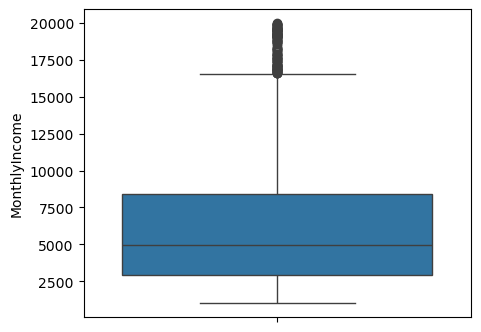

'This plot basically tells that there exists some outliers. But outliers in salary (MonthlyIncome) are not always bad, they are often genuine because salary naturally varies a lot between employees due to legitimate reasons such as:\n\nExperience level,\n\nJob role (junior vs manager),\n\nSkill set and specialization'

In [1064]:
plt.figure(figsize = [5,4])
sns.boxplot(data = df['MonthlyIncome'])
plt.show()

'''This plot basically tells that there exists some outliers. But outliers in salary (MonthlyIncome) are not always bad, they are often genuine because salary naturally varies a lot between employees due to legitimate reasons such as:

Experience level,

Job role (junior vs manager),

Skill set and specialization'''

In [1065]:
q1 = np.percentile(df['MonthlyIncome'],25)
q3 = np.percentile(df['MonthlyIncome'],75)
iqr = q3 - q1
lower_bound = q1-(1.5*iqr)
upper_bound = q3+(1.5*iqr)

df[(df['MonthlyIncome']<lower_bound) | (df['MonthlyIncome']>upper_bound)].JobRole.unique()

array(['Manager', 'Research Director'], dtype=object)

In [1066]:
# see these are the one of the highest positions in a compnay. so ofcourse they get paid more naturally compared to others..

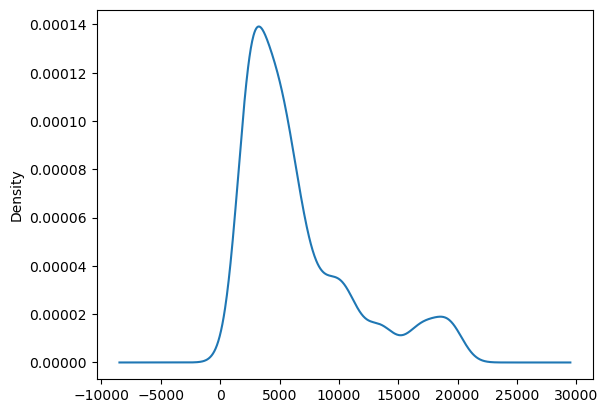

'Since these outliers represent real-world differences in job-roles, lets keep them and handle Right-Skewness (Using Log Transformation).'

In [1067]:
df['MonthlyIncome'].plot.density()
plt.show()

'''Since these outliers represent real-world differences in job-roles, lets keep them and handle Right-Skewness (Using Log Transformation).'''

In [1068]:
df['MonthlyIncome'] = np.log1p(df['MonthlyIncome'])

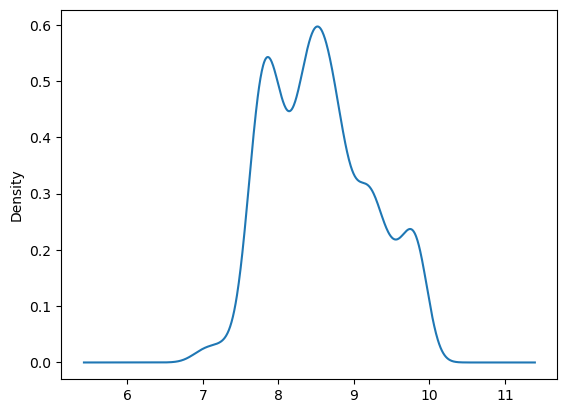

In [1069]:
df['MonthlyIncome'].plot.density()
plt.show()

In [1070]:
df['Over18'].value_counts()

Over18
Y    1470
Name: count, dtype: int64

In [1071]:
(df[['StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']] < 0).sum()

StockOptionLevel           0
TotalWorkingYears          0
TrainingTimesLastYear      0
WorkLifeBalance            0
YearsAtCompany             0
YearsInCurrentRole         0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

In [1072]:
# Everything seems good..

In [1073]:
# lets first drop the columns which are truely irrelevant..
df.drop(columns = ['DailyRate','EmployeeCount','EmployeeNumber','HourlyRate','Over18','StandardHours','PerformanceRating'],inplace=True)

In [1074]:
df.head()

,Age,Attrition,BusinessTravel,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,Sales,1,2,Life Sciences,2,Female,3,2,Sales Executive,4,Single,8.698514,19479,8,Yes,11,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,Research & Development,8,1,Life Sciences,3,Male,2,2,Research Scientist,2,Married,8.543056,24907,1,No,23,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,Research & Development,2,2,Other,4,Male,2,1,Laboratory Technician,3,Single,7.645398,2396,6,Yes,15,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,Research & Development,3,4,Life Sciences,4,Female,3,1,Research Scientist,3,Married,7.975908,23159,1,Yes,11,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,Research & Development,2,1,Medical,1,Male,3,1,Laboratory Technician,2,Married,8.151622,16632,9,No,12,4,1,6,3,3,2,2,2,2


Performing Chi-Square test

In [1075]:
Categorical_cols = ['BusinessTravel','Department','Education','WorkLifeBalance','JobInvolvement','JobLevel','JobSatisfaction','RelationshipSatisfaction','StockOptionLevel','EnvironmentSatisfaction','EducationField','Gender','JobRole','MaritalStatus','OverTime']

for feature in Categorical_cols:
    observed_val = pd.crosstab(df['Attrition'],df[feature],margins=True)
    print(observed_val,"\n")

BusinessTravel  Non-Travel  Travel_Frequently  Travel_Rarely   All
Attrition                                                         
No                     138                208            887  1233
Yes                     12                 69            156   237
All                    150                277           1043  1470 

Department  Human Resources  Research & Development  Sales   All
Attrition                                                       
No                       51                     828    354  1233
Yes                      12                     133     92   237
All                      63                     961    446  1470 

Education    1    2    3    4   5   All
Attrition                              
No         139  238  473  340  43  1233
Yes         31   44   99   58   5   237
All        170  282  572  398  48  1470 

WorkLifeBalance   1    2    3    4   All
Attrition                               
No               55  286  766  126  1233
Yes        

In [1076]:
# since we confiremd that, we can perform chi-square test, lets calculate how strongly these categorical features are associated with target feature.

scores = []

for feature in Categorical_cols:
    ct = pd.crosstab(df['Attrition'],df[feature])

    p_value = chi2_contingency(ct)[1]
    scores.append(p_value)

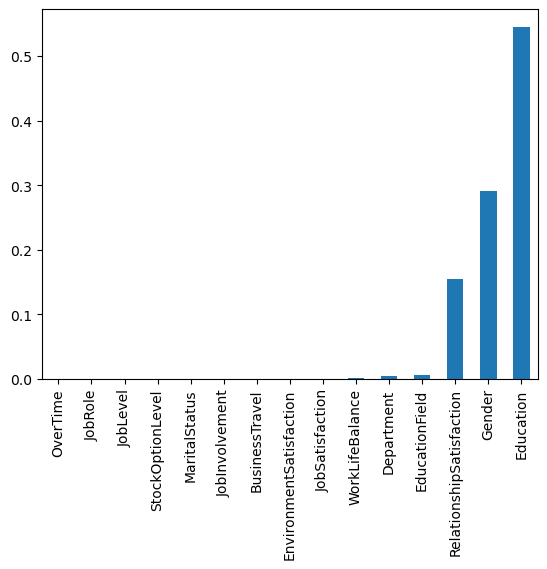

In [1077]:
pd.Series(scores,index = Categorical_cols).sort_values().plot(kind='bar')
plt.show()       # p_value < 0.05 indicates stronger association..

In [1078]:
df.drop(columns=['BusinessTravel','EnvironmentSatisfaction','JobSatisfaction','WorkLifeBalance','Department','EducationField','RelationshipSatisfaction','Gender','Education'],axis=1,inplace=True)

In [1079]:
df.head()

,Age,Attrition,DistanceFromHome,JobInvolvement,JobLevel,JobRole,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,1,3,2,Sales Executive,Single,8.698514,19479,8,Yes,11,0,8,0,6,4,0,5
1,49,No,8,2,2,Research Scientist,Married,8.543056,24907,1,No,23,1,10,3,10,7,1,7
2,37,Yes,2,2,1,Laboratory Technician,Single,7.645398,2396,6,Yes,15,0,7,3,0,0,0,0
3,33,No,3,3,1,Research Scientist,Married,7.975908,23159,1,Yes,11,0,8,3,8,7,3,0
4,27,No,2,3,1,Laboratory Technician,Married,8.151622,16632,9,No,12,1,6,3,2,2,2,2


In [1080]:
df = pd.get_dummies(df, columns=['JobRole','MaritalStatus','OverTime'], drop_first=False,dtype=int)

In [1081]:
le = LabelEncoder()
df['Attrition']= le.fit_transform(df['Attrition'])

In [1082]:
X = df.iloc[:,df.columns!='Attrition']
y = df.iloc[:,1]

Performing Annova

In [1083]:
cols = ['Age','DistanceFromHome','MonthlyIncome','MonthlyRate','NumCompaniesWorked','PercentSalaryHike','TotalWorkingYears','TrainingTimesLastYear','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']

In [1084]:
sel = SelectKBest(f_classif,k=6).fit(X[cols],y)
X[cols].columns[sel.get_support()]

Index(['Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsWithCurrManager'],
      dtype='object')

In [1085]:
list(set(cols) - set(X[cols].columns[sel.get_support()]))

['NumCompaniesWorked',
 'TrainingTimesLastYear',
 'YearsSinceLastPromotion',
 'DistanceFromHome',
 'MonthlyRate',
 'PercentSalaryHike']

In [1086]:
X = X.drop(list(set(cols) - set(X[cols].columns[sel.get_support()])),axis=1)

In [1087]:
X

,Age,JobInvolvement,JobLevel,MonthlyIncome,StockOptionLevel,TotalWorkingYears,YearsAtCompany,YearsInCurrentRole,YearsWithCurrManager,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_No,OverTime_Yes
0,41,3,2,8.698514,0,8,6,4,5,0,0,0,0,0,0,0,1,0,0,0,1,0,1
1,49,2,2,8.543056,1,10,10,7,7,0,0,0,0,0,0,1,0,0,0,1,0,1,0
2,37,2,1,7.645398,0,7,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1
3,33,3,1,7.975908,0,8,8,7,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1
4,27,3,1,8.151622,1,6,2,2,2,0,0,1,0,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,4,2,7.852439,1,17,5,2,3,0,0,1,0,0,0,0,0,0,0,1,0,1,0
1466,39,2,3,9.209540,1,9,7,7,7,1,0,0,0,0,0,0,0,0,0,1,0,1,0
1467,27,4,2,8.723069,1,6,6,2,3,0,0,0,0,1,0,0,0,0,0,1,0,0,1
1468,49,2,2,8.592486,0,17,9,6,8,0,0,0,0,0,0,0,1,0,0,1,0,1,0


In [1088]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [1089]:
# from imblearn.over_sampling import SMOTENC
# from sklearn.preprocessing import LabelEncoder

# # Suppose X has both numeric and categorical columns
# categorical_features = [1,2,4,9,10,11,12,13,14,15,16,17,18,19,20,21,22]  # column indices that are categorical

# smote_nc = SMOTENC(categorical_features=categorical_features, random_state=42)
# X_train, y_train = smote_nc.fit_resample(X_train, y_train)

In [1090]:
# from imblearn.under_sampling import RandomUnderSampler

# # Create the undersampler
# undersample = RandomUnderSampler(random_state=42)

# # Apply it
# X_train, y_train = undersample.fit_resample(X_train, y_train)


In [1143]:
from imblearn.over_sampling import RandomOverSampler

# Create oversampler object
ros = RandomOverSampler(random_state=42)

# Fit and resample
X_train, y_train = ros.fit_resample(X_train,y_train)

In [1144]:
y_train.value_counts()

Attrition
0    978
1    978
Name: count, dtype: int64

In [1145]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train,y_train)
y_pred = dt.predict(X_test)
accuracy_score(y_test,y_pred)

0.7721088435374149

In [1146]:
bag = BaggingClassifier(DecisionTreeClassifier(random_state=42,class_weight={0:0.2,1:2.9}),
                       n_estimators=5000,
                       max_samples=0.25,
                       bootstrap=True,
                       random_state=42)

In [ ]:
bag.fit(X_train,y_train)

In [ ]:
y_pred = bag.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_test,y_pred)

In [ ]:
accuracy_score(y_train,bag.predict(X_train))

In [ ]:
precision_score(y_train,bag.predict(X_train))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train, y_train)

In [ ]:
accuracy_score(y_test,model.predict(X_test))

In [ ]:
precision_score(y_test,model.predict(X_test))